In [3]:
import tifffile
import cv2
import os
from pathpretrain.utils import generate_tissue_mask
import scipy.ndimage as ndimage
import pandas as pd
import numpy as np
from skimage.util import compare_images
from skimage.measure import regionprops_table
from skimage import exposure
import pickle
import matplotlib.pyplot as plt
import matplotlib; matplotlib.rcParams['figure.dpi']=300
from tqdm import tqdm

In [20]:
with open('/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_2/new_metals.pkl', "rb") as input_file:
    metal_data = pickle.load(input_file)


In [21]:
metal_data['metals'].keys()

dict_keys(['Ca44', 'Co59', 'Cu63', 'Fe56', 'Mg24', 'Mn55', 'Na23', 'Ni60', 'Zn66', 'All'])

In [43]:
with open('final_mask_pre.npy', 'rb') as f:
    final_mask_pre = np.load(f)

In [44]:
final_mask_pre.shape

(1081, 1500)

In [45]:
final_mask_pre

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [48]:
metal_data['metals']['All'][600, 600]

11.77207683119923

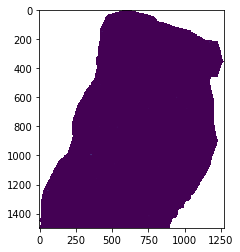

In [15]:
plt.imshow(metal_data['metals']['All'])

In [49]:
metal_data['metals']['All'][~final_mask_pre] = np.nan

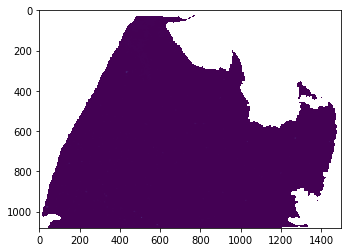

In [50]:
plt.imshow(metal_data['metals']['All'])

In [5]:
# check data
image = tifffile.imread('/Users/luyunrui/Desktop/Dartmouth/metals_app/data/colon/H_E_resized.tiff')

In [6]:
image.shape

(1499, 1047, 3)

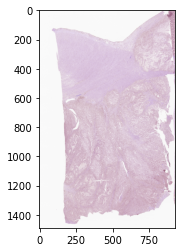

In [15]:
plt.imshow(image[10:, 120:, :])

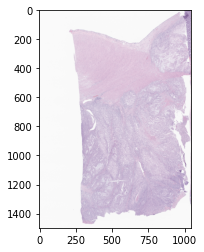

In [9]:
plt.imshow(image)

In [5]:
with open('/Users/luyunrui/Desktop/Dartmouth/metals_app/metals_app_data/colon/colon_metals.pkl', "rb") as input_file:
    metal_data = pickle.load(input_file)


In [8]:
metal_data['metals']['Na23'].shape

(1499, 1047)

In [12]:
# generate new data to try
with open('/Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/new_1/new_metals.pkl', "rb") as input_file:
    metal_data = pickle.load(input_file)

In [13]:
metal_data['metals']['All'].shape

(1499, 1111)

In [14]:
1499/1111

1.3492349234923493

In [30]:
image = tifffile.imread('/Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/new_1/_SS12251_142720.svs')
# test=cv2.resize(image,None,fx=1/32,fy=1/32)
# tifffile.imwrite('/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_3/_SS12251_141106_new.tiff', np.array(test), photometric='rgb')

In [10]:
image.shape

(52958, 73704, 3)

In [17]:
100828/74879

1.3465457604935964

In [28]:
1499/100828

0.014866902051017575

(1188, 1188, 3)


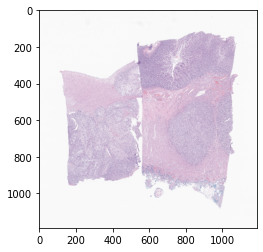

In [13]:
test=cv2.resize(image,None,fx=0.014866902051017575,fy=0.014866902051017575)
print(test.shape)
plt.imshow(test)


In [17]:
image_rgb = cv2.cvtColor(image[10:, 120:, :], cv2.COLOR_BGR2RGB)

In [18]:

tifffile.imwrite('/Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/colon/hne_resized_new.tiff', np.array(image_rgb), photometric='rgb')

In [18]:
# 2 generate new data to try
with open('/Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/new_2/new_metals.pkl', "rb") as input_file:
    metal_data = pickle.load(input_file)

In [20]:
metal_data['metals']['All'].shape

(1499, 1345)

In [22]:
1499/1345

1.1144981412639405

In [33]:
image = tifffile.imread('/Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/new_2/_SS12251_141217.svs')

In [21]:
image.shape

(69850, 70454, 3)

In [23]:
70454/69850

1.0086471009305655

In [34]:
1499/70454

0.021276293751951628

In [ ]:
test=cv2.resize(image,None,fx=0.014866902051017575,fy=0.014866902051017575)
print(test.shape)
tifffile.imwrite('/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_1/_SS12251_142720_co.tiff', np.array(test), photometric='rgb')

In [24]:
# 4 generate new data to try
with open('/Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/new_4/new_metals.pkl', "rb") as input_file:
    metal_data = pickle.load(input_file)

In [25]:
metal_data['metals']['All'].shape

(1081, 1500)

In [26]:
image = tifffile.imread('/Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/new_4/_SS12251_141332.svs')

In [27]:
image.shape

(58988, 62810, 3)

In [ ]:
# orginal pipeline
slide_x, slide_y, metals_x, metals_y = [], [], [], []
for one_index in range(len(table_data)):
    if table_data[one_index]['hne x'] != '-' and table_data[one_index]['hne y'] != '-' and table_data[one_index]['metals x'] != '-' and table_data[one_index]['metals y'] != '-':
        slide_x.append(table_data[one_index]['hne x'])
        slide_y.append(table_data[one_index]['hne y'])
        metals_x.append(table_data[one_index]['metals x'])
        metals_y.append(table_data[one_index]['metals y'])
df_co = {'image': [], 'element': [],}
for one_metal in list(metal_data['metals'].keys()):
    df_co['image'].append(metal_data['metals'][one_metal])
    df_co['element'].append(one_metal)
dfs_new_df_co = pd.DataFrame(df_co)
metals_im_gray=dfs_new_df_co['image'].mean(0)
warped_metals = warp_metals(slide_x, slide_y, metals_x, metals_y, dfs_new_df_co)

In [5]:
!ls /Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/colon

17.svs                                SP19_31508_A3 K41_ppm matrix.xlsx
SP19_31508_A3 Ag109_ppm matrix.xlsx   SP19_31508_A3 Mg24_ppm matrix.xlsx
SP19_31508_A3 Al27_ppm matrix.xlsx    SP19_31508_A3 Mn55_ppm matrix.xlsx
SP19_31508_A3 As75_ppm matrix.xlsx    SP19_31508_A3 Mo98_ppm matrix.xlsx
SP19_31508_A3 Ba138_ppm matrix.xlsx   SP19_31508_A3 Na23_ppm matrix.xlsx
SP19_31508_A3 Ca44_ppm matrix.xlsx    SP19_31508_A3 Ni60_ppm matrix.xlsx
SP19_31508_A3 Cd111_ppm matrix.xlsx   SP19_31508_A3 PbTotal_ppm matrix.xlsx
SP19_31508_A3 Co59_ppm matrix.xlsx    SP19_31508_A3 Pt196_ppm matrix.xlsx
SP19_31508_A3 Cr52_ppm matrix.xlsx    SP19_31508_A3 Ru102_ppm matrix.xlsx
SP19_31508_A3 Cu63_ppm matrix.xlsx    SP19_31508_A3 Sb123_ppm matrix.xlsx
SP19_31508_A3 Cu65_ppm matrix.xlsx    SP19_31508_A3 Se80_ppm matrix.xlsx
SP19_31508_A3 Fe56_ppm matrix.xlsx    SP19_31508_A3 Tl205_ppm matrix.xlsx
SP19_31508_A3 Fe57_ppm matrix.xlsx    SP19_31508_A3 V51_ppm matrix.xlsx
SP19_31508_A3 Gd156_ppm matrix.xlsx   SP19_315

In [5]:
! pwd

/Users/luyunrui/Desktop/Dartmouth/metals_app


In [14]:
matrix_list = [
'SP19_31508_A3 Ag109_ppm matrix.xlsx',
'SP19_31508_A3 Mg24_ppm matrix.xlsx',
'SP19_31508_A3 Al27_ppm matrix.xlsx',
'SP19_31508_A3 Mn55_ppm matrix.xlsx',
'SP19_31508_A3 As75_ppm matrix.xlsx',
'SP19_31508_A3 Mo98_ppm matrix.xlsx',
'SP19_31508_A3 Ba138_ppm matrix.xlsx',
'SP19_31508_A3 Na23_ppm matrix.xlsx',
'SP19_31508_A3 Ca44_ppm matrix.xlsx',
'SP19_31508_A3 Ni60_ppm matrix.xlsx',
'SP19_31508_A3 Cd111_ppm matrix.xlsx',
'SP19_31508_A3 PbTotal_ppm matrix.xlsx',
'SP19_31508_A3 Co59_ppm matrix.xlsx',
'SP19_31508_A3 Pt196_ppm matrix.xlsx',
'SP19_31508_A3 Cr52_ppm matrix.xlsx',
'SP19_31508_A3 Ru102_ppm matrix.xlsx',
'SP19_31508_A3 Cu63_ppm matrix.xlsx',
'SP19_31508_A3 Sb123_ppm matrix.xlsx',
'SP19_31508_A3 Cu65_ppm matrix.xlsx',
'SP19_31508_A3 Se80_ppm matrix.xlsx',
'SP19_31508_A3 Fe56_ppm matrix.xlsx',
'SP19_31508_A3 Tl205_ppm matrix.xlsx',
'SP19_31508_A3 Fe57_ppm matrix.xlsx',
'SP19_31508_A3 V51_ppm matrix.xlsx',
'SP19_31508_A3 Gd156_ppm matrix.xlsx',
'SP19_31508_A3 Zn66_ppm matrix.xlsx',
]

In [15]:
'SP19_31508_A3 Ag109_ppm matrix.xlsx'[14:-16]

'Ag109'

In [17]:
to_save_dict = {}
for one_matrix_path in tqdm(matrix_list):
    WS = pd.read_excel('/Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/colon/'+one_matrix_path)
    to_save_dict[one_matrix_path[14:-16]] = np.array(WS)

# with open('/Users/luyunrui/Desktop/Dartmouth/metals_app/metal_map_data/colon/new_metals.pkl', 'wb') as handle:
#     pickle.dump({'metals'}, handle)

100%|██████████| 26/26 [08:08<00:00, 18.79s/it]


In [1]:
'test.tiff'[:-5]

'test'

In [18]:
sum_of_arrays = np.sum(list(to_save_dict.values()), axis=0)

In [19]:
to_save_dict['All'] = sum_of_arrays

In [21]:
sum_of_arrays.shape

(1499, 1047)

In [20]:
with open('/Users/luyunrui/Desktop/Dartmouth/metals_app/data_with_xlsx/colon/new_metals.pkl', 'wb') as handle:
    pickle.dump({'metals':to_save_dict}, handle)

In [16]:
to_save_dict.keys()

dict_keys(['Ca44', 'Co59', 'Cu63', 'Fe56', 'Mg24', 'Mn55', 'Na23', 'Ni60', 'Zn66'])

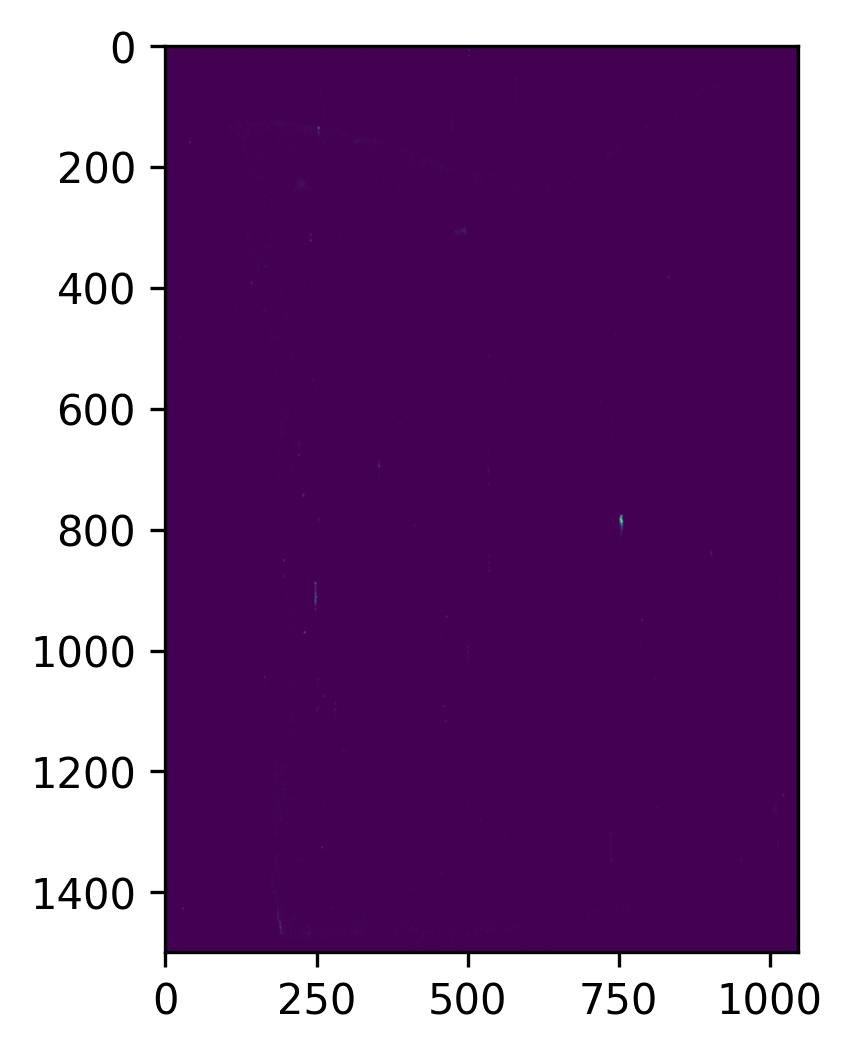

In [22]:
plt.imshow(to_save_dict['PbTotal'])
plt.show()

In [ ]:
del to_save_dict['PbTotal']

In [ ]:
with open('filename.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
WS = pd.read_excel('./data/colon/SP19_31508_A3 Cu65_ppm matrix.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: './data/colon/SP19_31508_A3 Cu65_ppm matrix.xlsx'

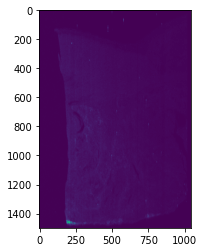

In [6]:
plt.imshow(WS)
plt.show()

In [15]:
WS.shape

(1499, 1047)

In [9]:
'SP19_31508_A3 Ag109_ppm matrix.xlsx'[14:-16]

'Ag109'

In [23]:
image = tifffile.imread('/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_3/_SS12251_141106.svs')
test=cv2.resize(image,None,fx=1/32,fy=1/32)
tifffile.imwrite('/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_3/_SS12251_141106_new.tiff', np.array(test), photometric='rgb')

In [24]:
image.shape

(42292, 61000, 3)

In [12]:
60799/32

1899.96875

In [25]:
test=cv2.resize(image,None,fx=1/32,fy=1/32)

In [4]:
min(1, 2)

1

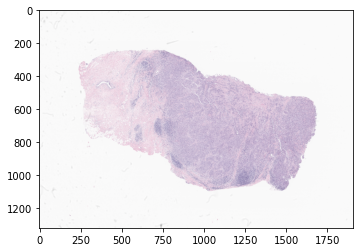

In [26]:
plt.imshow(test)

In [27]:
tifffile.imwrite('/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_3/_SS12251_141106_new.tiff', np.array(test), photometric='rgb')

In [2]:
with open('/Users/luyunrui/Desktop/Dartmouth/metals_app/data/new_1/new_metals.pkl', "rb") as input_file:
    metal_data = pickle.load(input_file)

In [3]:
metal_data['metals']

{'Ca44': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'Co59': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'Cu63': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'Fe56': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan,

In [12]:
with open('im_small_crop_co.npy', 'rb') as f:
    im_small_crop_co = np.load(f)
    # b = np.load(f)
with open('padded_metal_image_rgb_co.npy', 'rb') as f:
    padded_metal_image_rgb_co = np.load(f)
    # b = np.load(f)

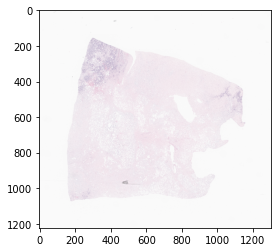

In [13]:
plt.imshow(im_small_crop_co)

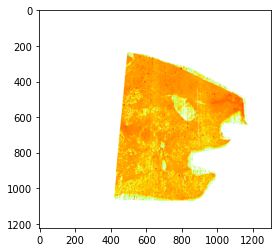

In [14]:
plt.imshow(padded_metal_image_rgb_co)

In [15]:
with open('final_mask_pre.npy', 'rb') as f:
    final_mask_pre = np.load(f)

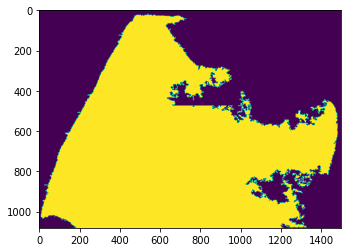

In [16]:
plt.imshow(final_mask_pre)

In [17]:
'coregistered_metals.pkl'[:-4]

'coregistered_metals'

In [18]:
image = cv2.imread('tissue_mask_test.png', 0)

In [19]:
type(image)

numpy.ndarray

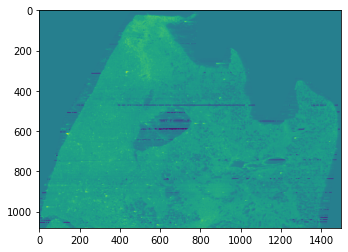

In [20]:
plt.imshow(image)

In [21]:
blurred = cv2.GaussianBlur(image, (1, 1), 0)

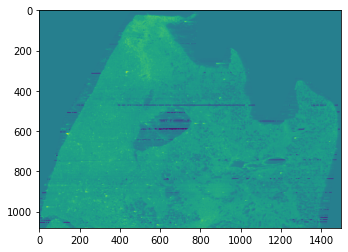

In [22]:
plt.imshow(blurred)

In [1]:
test = [1, 2, 3]
test_1 = test.copy()
test_1.append(4)
test

[1, 2, 3]

In [2]:
test_1

[1, 2, 3, 4]